#### Загрузка данных

1. Выбрать бизнес-цель для набора данных по Вашему варианту задания для решения задачи кластеризации.
2. Выполнить понижение размерности и визуализацию данных.
3. Выполнить выбор количества кластеров на основе оценки инерции и коэффициента силуэта.
4. Выполнить кластерный анализ с применением иерархического и неиерархического алгоритма кластеризации.
5. Оценить качество решения.

In [149]:
from sklearn import datasets
import pandas as pd

sightdf = pd.read_excel("data/India_tourist_places.xlsx")
# display(sightdf.head())

sightdf = sightdf[["State","City","Significance","Type","Zone"]]

sightdf['Zone'] = sightdf['Zone'].replace('Eastern', 'NorthEastern')
sightdf['Zone'] = sightdf['Zone'].replace('Northern', 'NorthEastern')
sightdf['Zone'] = sightdf['Zone'].replace('North Eastern', 'NorthEastern')

sightdf['Zone'] = sightdf['Zone'].replace('Southern', 'SouthernWestern')
sightdf['Zone'] = sightdf['Zone'].replace('Western', 'SouthernWestern')

# sightdf = sightdf.sort_values(by=["State", "City", "Significance", "Type"])
sightdf = sightdf.sort_values(by=["Zone", "Type", "Significance"])


display(sightdf["Zone"].unique())

sightdf['Significance'] = pd.factorize(sightdf['Significance'])[0]
sightdf['State'] = pd.factorize(sightdf['State'])[0]
sightdf['City'] = pd.factorize(sightdf['City'])[0]
sightdf['Type'] = pd.factorize(sightdf['Type'])[0]

sightdf['Zone_num'] = pd.factorize(sightdf['Zone'])[0]


display(sightdf.head())


y = sightdf["Zone_num"]  # type: ignore
display(y)

y_names = sightdf["Zone"] # type: ignore
sightdf = sightdf.drop(["Zone"],axis=1)
display(y_names.unique())
display(y_names)

y_names_unique = y_names.unique()

display("--------")
display(sightdf)



array(['Central', 'NorthEastern', 'SouthernWestern'], dtype=object)

,State,City,Significance,Type,Zone,Zone_num
259,0,0,0,0,Central,0
170,0,1,1,1,Central,0
9,1,2,2,2,Central,0
159,1,3,2,2,Central,0
235,0,4,2,2,Central,0


259    0
170    0
9      0
159    0
235    0
      ..
84     2
102    2
283    2
151    2
269    2
Name: Zone_num, Length: 302, dtype: int64

array(['Central', 'NorthEastern', 'SouthernWestern'], dtype=object)

259            Central
170            Central
9              Central
159            Central
235            Central
            ...       
84     SouthernWestern
102    SouthernWestern
283    SouthernWestern
151    SouthernWestern
269    SouthernWestern
Name: Zone, Length: 302, dtype: object

'--------'

,State,City,Significance,Type,Zone_num
259,0,0,0,0,0
170,0,1,1,1,0
9,1,2,2,2,0
159,1,3,2,2,0
235,0,4,2,2,0
...,...,...,...,...,...
84,27,146,6,15,2
102,20,208,6,15,2
283,20,209,6,15,2
151,19,210,0,16,2


#### Визуализация данных с учетом понимания из особенностей

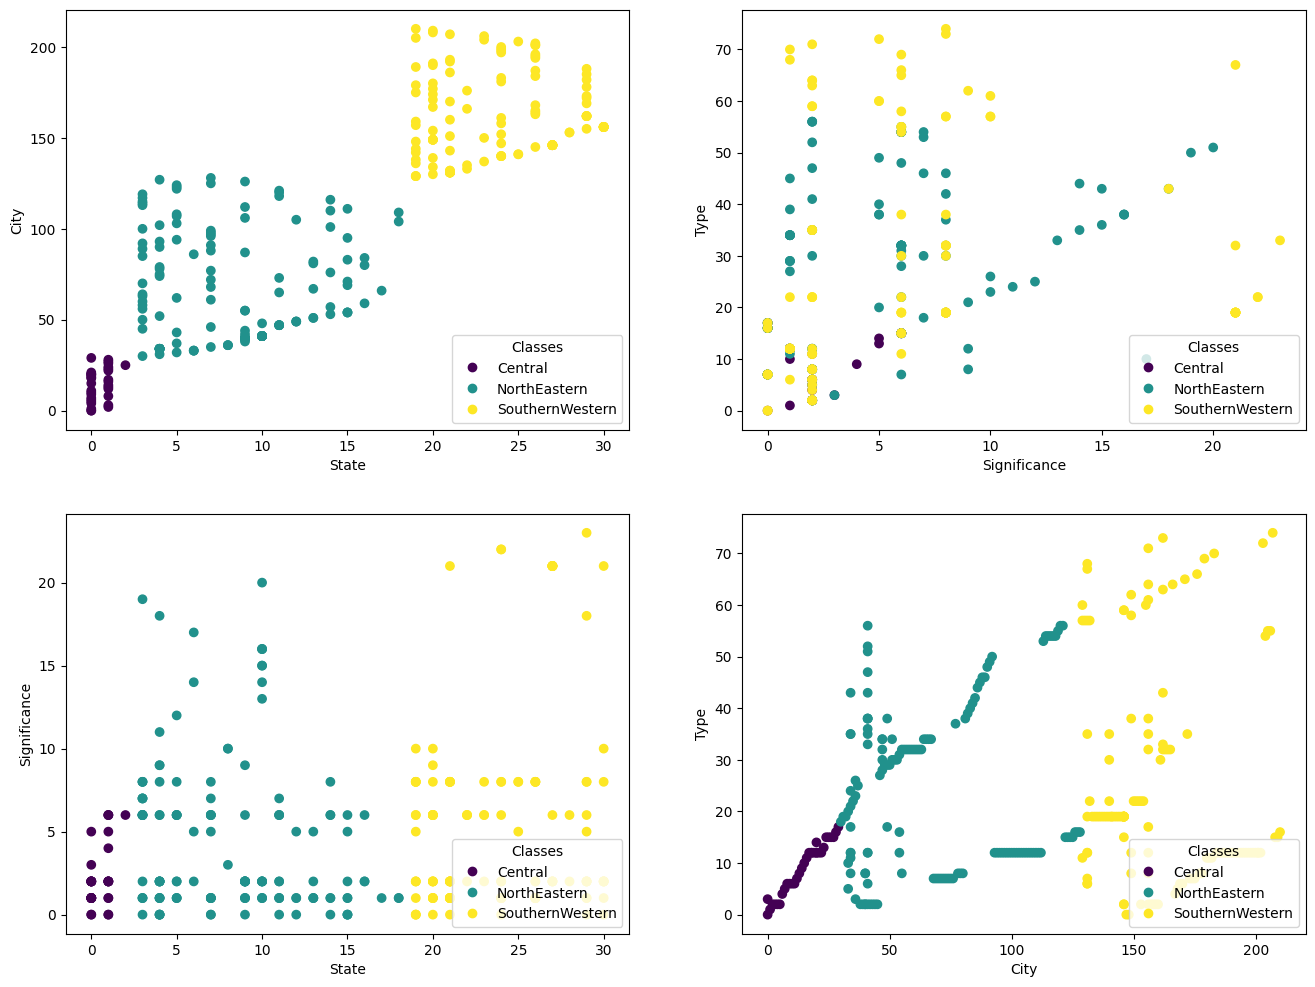

In [150]:
from src.visual import draw_data_2d
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

draw_data_2d(sightdf, 0, 1, y, y_names_unique, plt.subplot(2, 2, 1))
draw_data_2d(sightdf, 2, 3, y, y_names_unique, plt.subplot(2, 2, 2))
draw_data_2d(sightdf, 0, 2, y, y_names_unique, plt.subplot(2, 2, 3))
draw_data_2d(sightdf, 1, 3, y, y_names_unique, plt.subplot(2, 2, 4))



#### Визуализация данных без понимания их особенностей

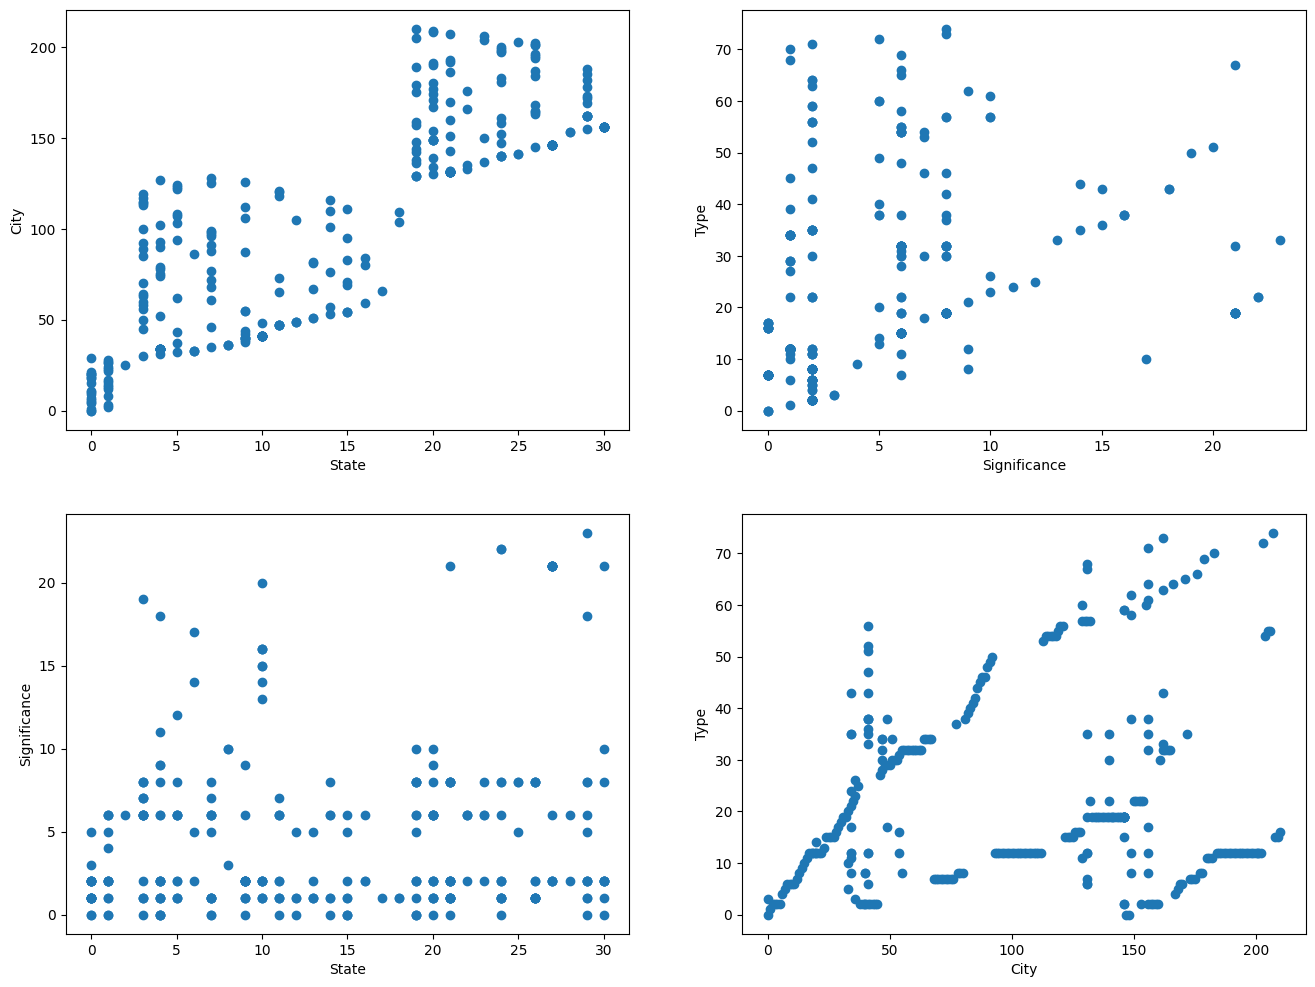

In [151]:
plt.figure(figsize=(16, 12))
draw_data_2d(sightdf, 0, 1, subplot=plt.subplot(2, 2, 1))
draw_data_2d(sightdf, 2, 3, subplot=plt.subplot(2, 2, 2))
draw_data_2d(sightdf, 0, 2, subplot=plt.subplot(2, 2, 3))
draw_data_2d(sightdf, 1, 3, subplot=plt.subplot(2, 2, 4))

#### Иерархическая агломеративная кластеризация

Также формируется дендрограмма

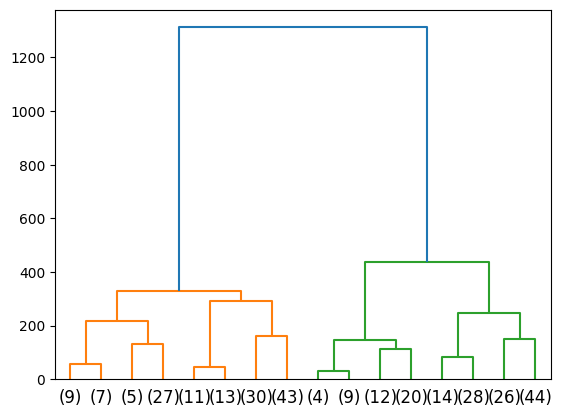

In [152]:
from src.clusters import get_linkage_matrix, run_agglomerative
from src.visual import draw_dendrogram
from scipy.cluster import hierarchy

tree = run_agglomerative(sightdf)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

#### Получение результатов иерархической кластеризации

Также производится сравнение с реальным разбиением

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

array([76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 75, 74, 74, 74, 74,
       74, 74, 73, 73, 73, 73, 73, 73, 73, 88, 88, 88, 88, 88, 88, 87, 87,
       83, 83, 83, 83, 83, 83, 82, 82, 82, 82, 81, 81, 81, 81, 81, 81, 80,
       81, 80, 69, 68, 69, 69, 66, 68, 69, 66, 72, 72, 68, 72, 70, 72, 70,
       72, 70, 70, 70, 70, 81, 61, 85, 70, 67, 71, 67, 71, 71, 67, 79, 61,
       64, 64, 54, 50, 53, 50, 53, 53, 53, 53, 51, 61, 47, 79, 52, 52, 51,
       85, 78, 79, 61, 61, 61, 45, 67, 45, 84, 45, 45, 46, 62, 61, 46, 48,
       86, 48, 48, 65, 48, 48, 49, 57, 56, 58, 56, 56, 56, 56, 86, 55, 58,
       55, 55, 58, 60, 79, 60, 60, 60, 77, 59, 79, 59, 59, 86, 60, 63, 65,
        1,  1,  1,  2,  1,  2,  1,  2,  2, 65, 35, 35, 35, 35, 36, 36, 77,
       36, 86, 77,  3,  3,  3,  3, 41, 41, 41, 44, 44, 44, 44, 42, 42, 42,
       43, 41, 43, 43, 42, 37, 37, 37, 37, 37, 37, 37, 37, 33, 33, 17, 29,
       29, 41, 37, 38, 29, 29, 16, 16, 19,  3, 19, 30, 31, 31, 30, 31, 31,
       33, 33, 17, 12, 39

259    0
170    0
9      0
159    0
235    0
      ..
84     2
102    2
283    2
151    2
269    2
Name: Zone_num, Length: 302, dtype: int64

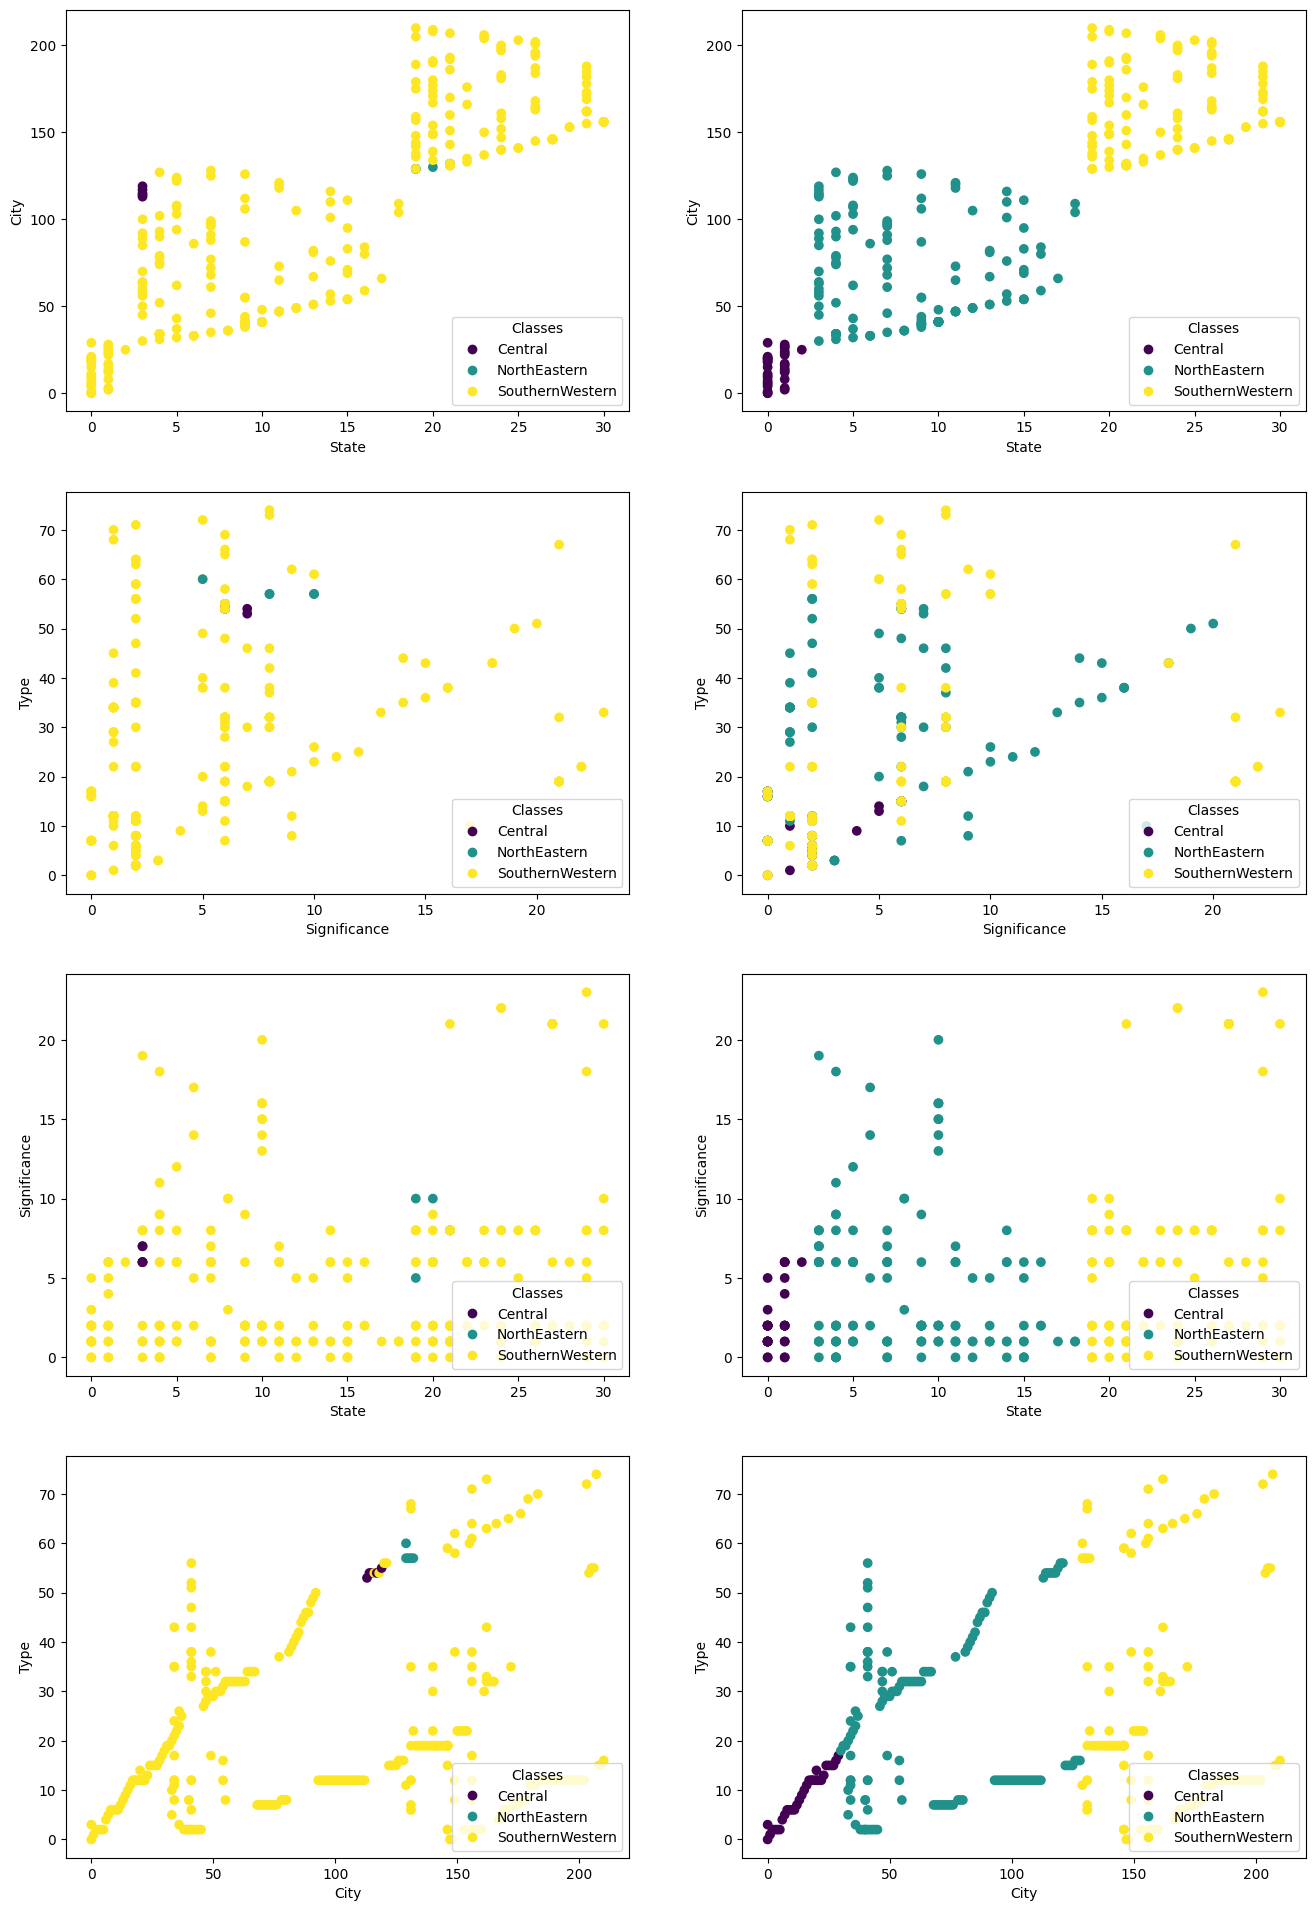

In [153]:
result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")
display(result)
display(y)
result = [0 if val == 1 else 1 if val == 3 else 2 for val in result]

plt.figure(figsize=(16, 24))
draw_data_2d(sightdf, 0, 1, result, y_names_unique, plt.subplot(4, 2, 1))
draw_data_2d(sightdf, 0, 1, y, y_names_unique, plt.subplot(4, 2, 2))
draw_data_2d(sightdf, 2, 3, result, y_names_unique, plt.subplot(4, 2, 3))
draw_data_2d(sightdf, 2, 3, y, y_names_unique, plt.subplot(4, 2, 4))
draw_data_2d(sightdf, 0, 2, result, y_names_unique, plt.subplot(4, 2, 5))
draw_data_2d(sightdf, 0, 2, y, y_names_unique, plt.subplot(4, 2, 6))
draw_data_2d(sightdf, 1, 3, result, y_names_unique, plt.subplot(4, 2, 7))
draw_data_2d(sightdf, 1, 3, y, y_names_unique, plt.subplot(4, 2, 8))

#### Неиерархическая четка кластеризация (k-means)

In [154]:
from src.clusters import print_cluster_result, run_kmeans

random_state = 9

labels, centers = run_kmeans(sightdf, 2, random_state)
print_cluster_result(sightdf, 2, labels)
display(centers)
display(y)

Cluster 1 (145):
259, 170, 9, 159, 235, 286, 131, 110, 22, 42, 111, 234, 236, 162, 226, 106, 16, 294, 8, 17, 18, 21, 23, 47, 48, 227, 41, 288, 105, 127, 160, 228, 161, 276, 11, 175, 277, 6, 82, 168, 72, 282, 181, 247, 93, 94, 96, 134, 147, 148, 180, 215, 230, 167, 300, 27, 71, 109, 173, 263, 178, 287, 290, 2, 97, 108, 112, 163, 189, 231, 274, 295, 229, 130, 266, 5, 10, 50, 51, 52, 67, 123, 124, 137, 136, 81, 83, 46, 126, 164, 186, 233, 237, 239, 240, 260, 265, 292, 213, 176, 177, 188, 207, 214, 248, 76, 135, 280, 25, 246, 64, 1, 66, 190, 43, 206, 196, 149, 92, 32, 169, 299, 267, 174, 232, 107, 114, 55, 65, 13, 14, 15, 28, 31, 44, 75, 125, 133, 205, 279, 132, 74, 244, 254, 264

--------
Cluster 2 (157):
49, 53, 54, 69, 70, 95, 115, 116, 129, 171, 187, 216, 12, 285, 45, 113, 165, 172, 166, 19, 20, 179, 241, 261, 275, 91, 238, 258, 99, 195, 251, 301, 26, 154, 193, 98, 104, 150, 156, 182, 191, 192, 218, 250, 273, 293, 296, 85, 86, 142, 143, 208, 209, 255, 272, 243, 298, 198, 40, 103, 223, 

array([[  6.43448276,  46.52413793,   4.2       ,  20.24137931,
          0.76551724],
       [ 21.08280255, 152.79617834,   5.13375796,  25.86624204,
          1.82165605]])

259    0
170    0
9      0
159    0
235    0
      ..
84     2
102    2
283    2
151    2
269    2
Name: Zone_num, Length: 302, dtype: int64

#### Визуализация результатов кластеризации

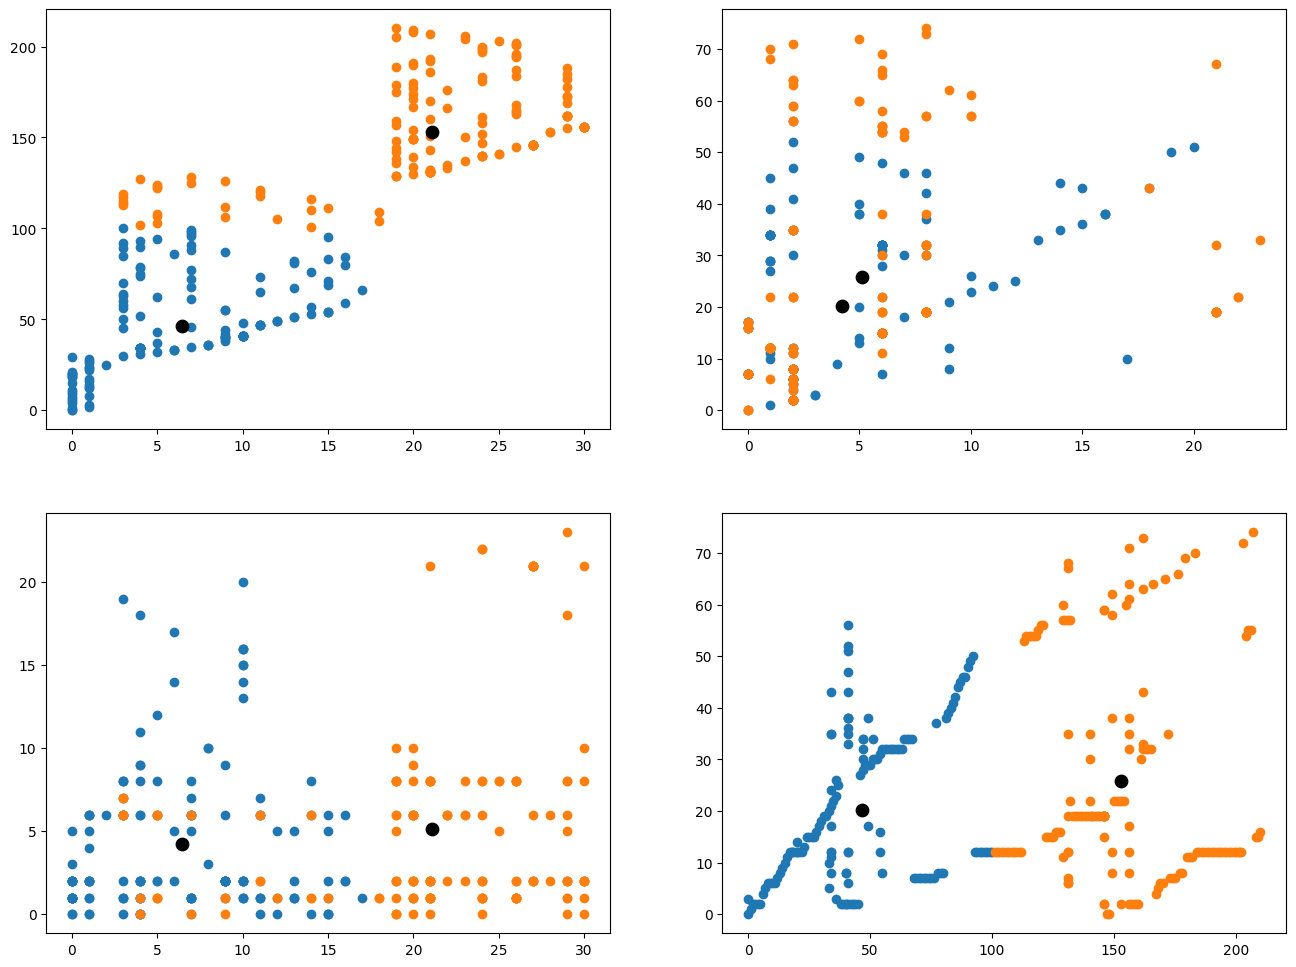

In [156]:
from src.visual import draw_cluster_results

plt.figure(figsize=(16, 12))
draw_cluster_results(sightdf, 0, 1, labels, centers, plt.subplot(2, 2, 1))
draw_cluster_results(sightdf, 2, 3, labels, centers, plt.subplot(2, 2, 2))
draw_cluster_results(sightdf, 0, 2, labels, centers, plt.subplot(2, 2, 3))
draw_cluster_results(sightdf, 1, 3, labels, centers, plt.subplot(2, 2, 4))

#### Разбиение на 3 кластера и сравнение с реальным разбиением

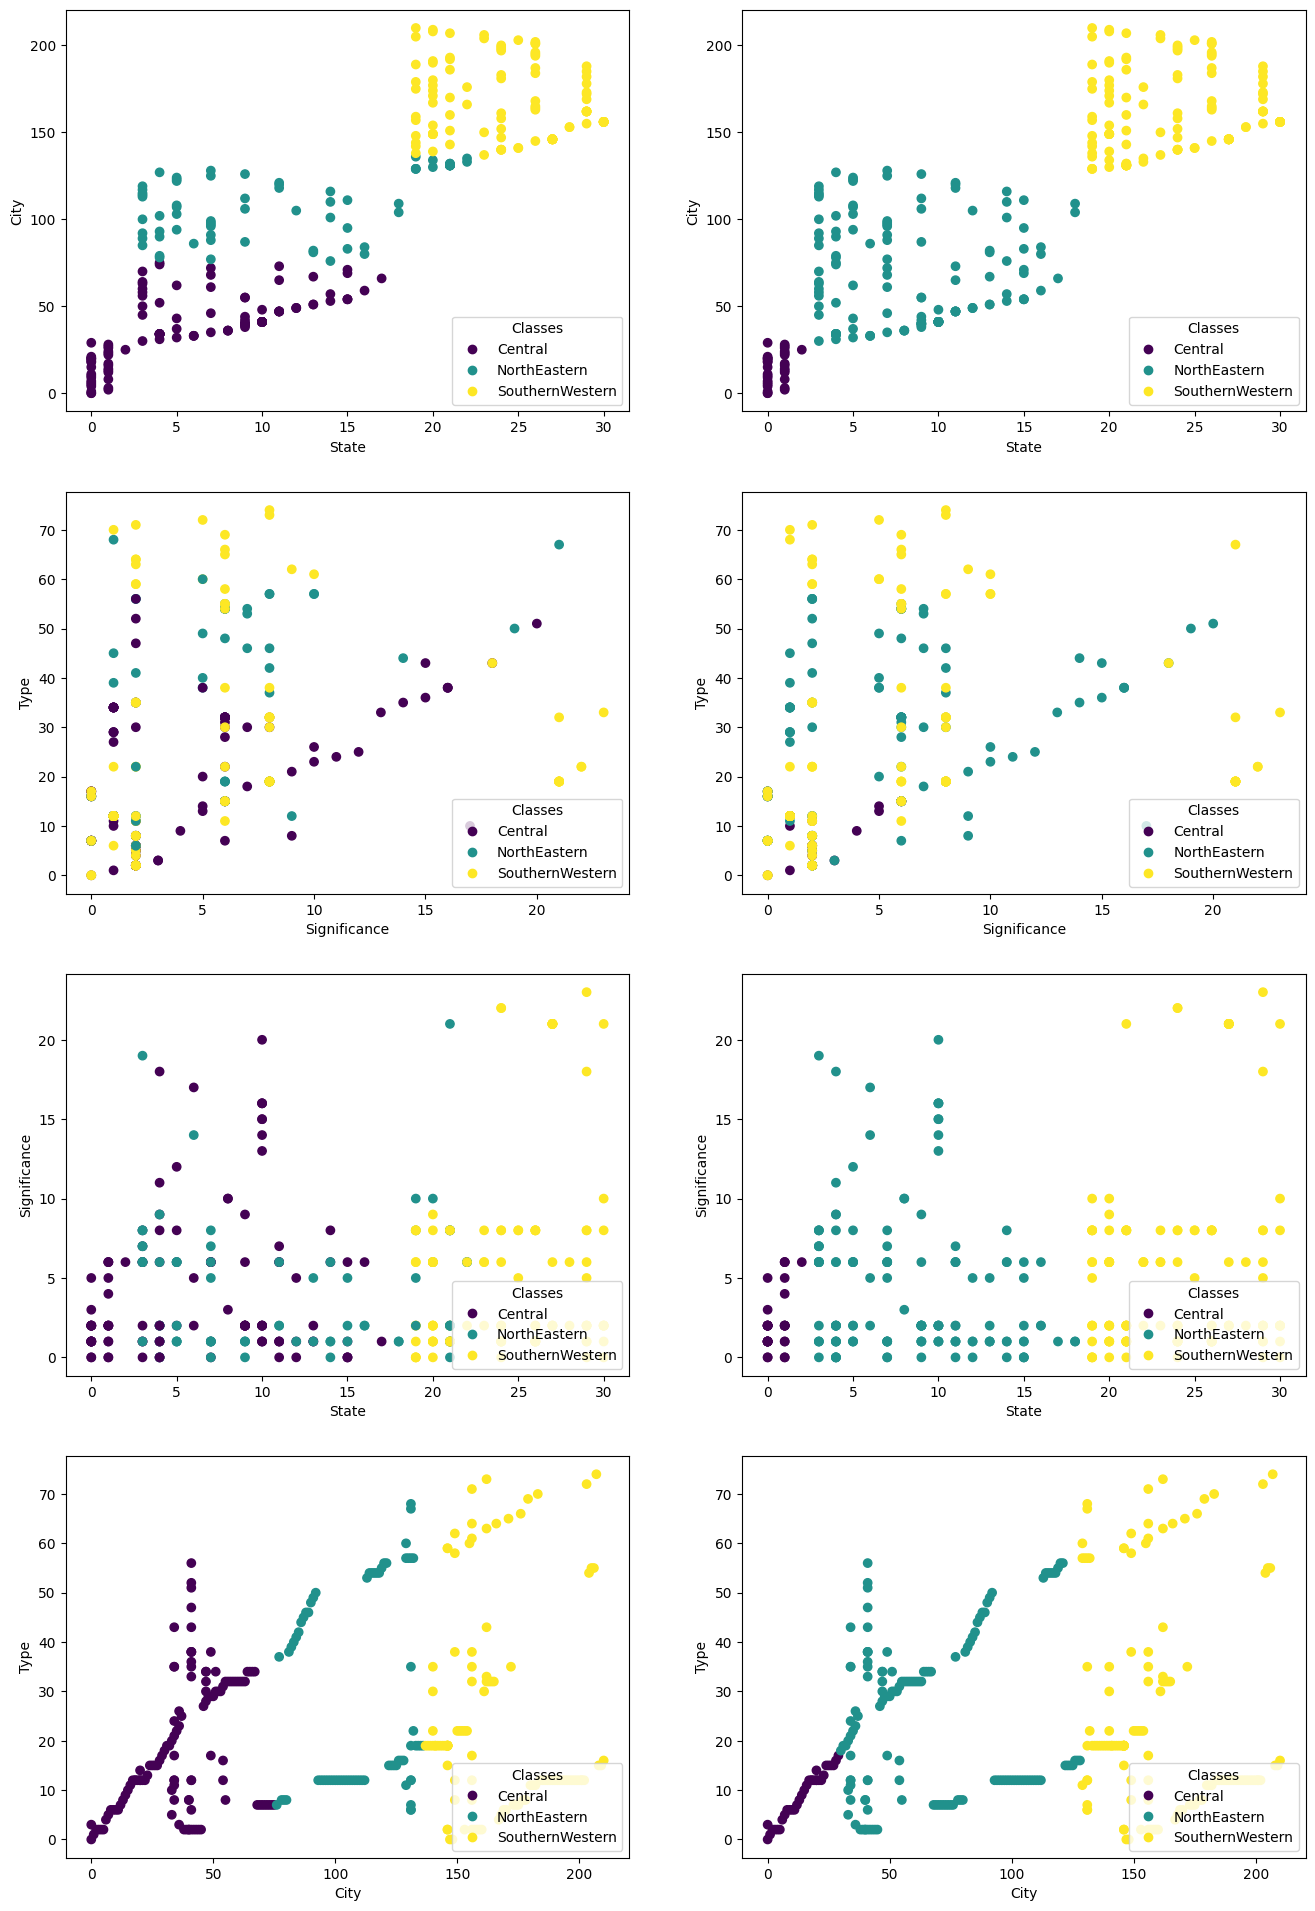

In [157]:
labels, centers = run_kmeans(sightdf, 3, random_state)
labels = [2 if val == 1 else 1 if val == 2 else val for val in labels]

plt.figure(figsize=(16, 24))
draw_data_2d(sightdf, 0, 1, labels, y_names_unique, plt.subplot(4, 2, 1))
draw_data_2d(sightdf, 0, 1, y, y_names_unique, plt.subplot(4, 2, 2))
draw_data_2d(sightdf, 2, 3, labels, y_names_unique, plt.subplot(4, 2, 3))
draw_data_2d(sightdf, 2, 3, y, y_names_unique, plt.subplot(4, 2, 4))
draw_data_2d(sightdf, 0, 2, labels, y_names_unique, plt.subplot(4, 2, 5))
draw_data_2d(sightdf, 0, 2, y, y_names_unique, plt.subplot(4, 2, 6))
draw_data_2d(sightdf, 1, 3, labels, y_names_unique, plt.subplot(4, 2, 7))
draw_data_2d(sightdf, 1, 3, y, y_names_unique, plt.subplot(4, 2, 8))

#### Понижение размерности до n=2

In [158]:
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=2).fit_transform(sightdf)
reduced_data

array([[-104.04047957,  -16.88555215],
       [-102.98178828,  -15.85584443],
       [-101.78904739,  -14.8245361 ],
       [-100.80020121,  -14.88950777],
       [ -99.94540463,  -14.95608004],
       [ -98.95655845,  -15.02105171],
       [-103.83094425,  -13.601514  ],
       [ -97.8399548 ,  -13.10071207],
       [ -96.78722989,  -12.17302809],
       [ -95.60045538,  -11.24374349],
       [ -94.7456588 ,  -11.31031576],
       [ -93.75681261,  -11.37528743],
       [ -92.76796643,  -11.44025909],
       [ -91.59312467,  -10.71502196],
       [ -90.52846701,   -9.58329051],
       [ -89.46380934,   -8.45155906],
       [ -88.56303316,   -7.83154688],
       [ -87.37029227,   -6.80023855],
       [ -86.32353373,   -5.9745783 ],
       [ -85.46873715,   -6.04115057],
       [ -84.47989097,   -6.10612224],
       [ -85.46873715,   -6.04115057],
       [ -83.49104479,   -6.1710939 ],
       [ -82.5021986 ,   -6.23606557],
       [ -83.49104479,   -6.1710939 ],
       [ -81.37930282,   

#### Визуализация данных после понижения размерности

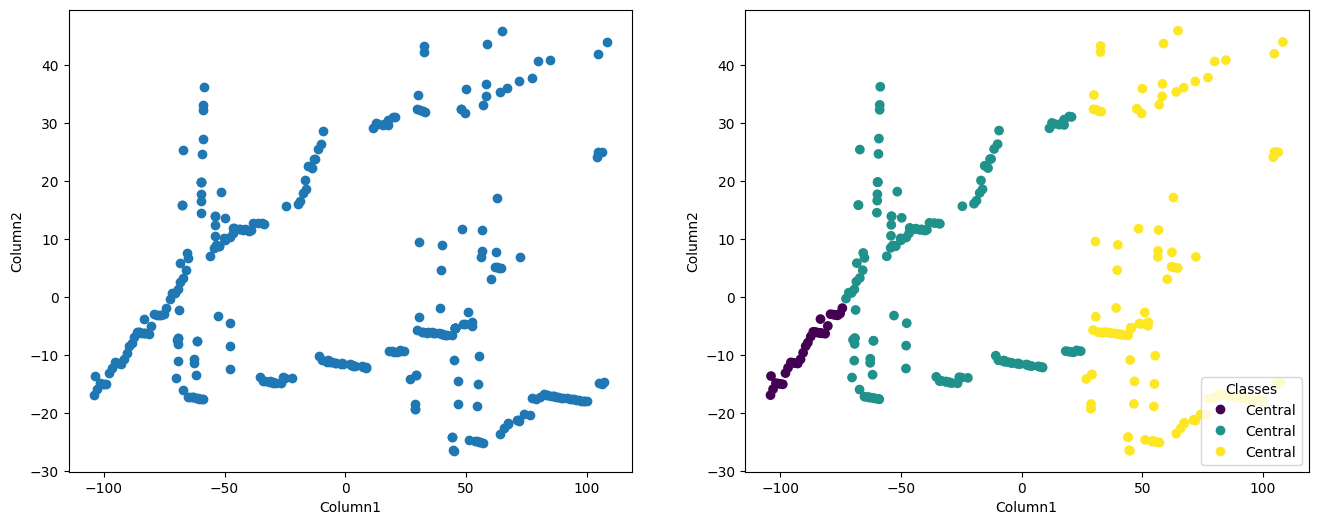

In [159]:
plt.figure(figsize=(16, 6))
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    subplot=plt.subplot(1, 2, 1),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    y,
    y_names,
    plt.subplot(1, 2, 2),
)

#### Визуализация результатов неиерархической кластеризации для двух кластеров с учетом понижения размерности

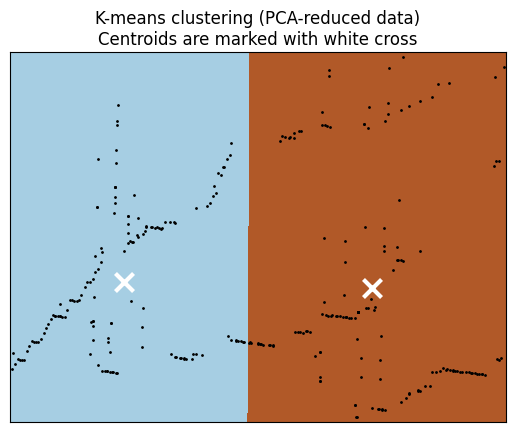

In [160]:
from src.clusters import fit_kmeans
from src.visual import draw_clusters


kmeans = fit_kmeans(reduced_data, 2, random_state)
draw_clusters(reduced_data, kmeans)

#### Визуализация результатов неиерархической кластеризации для трех кластеров с учетом понижения размерности

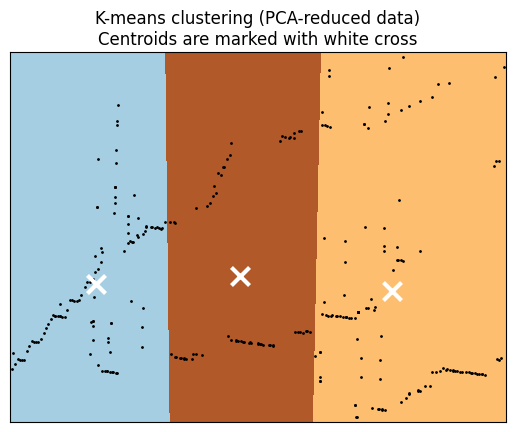

In [161]:
kmeans = fit_kmeans(reduced_data, 3, random_state)
draw_clusters(reduced_data, kmeans)

#### Сравнение результатов кластеризации с реальным разбиением с учетом понижения размерности

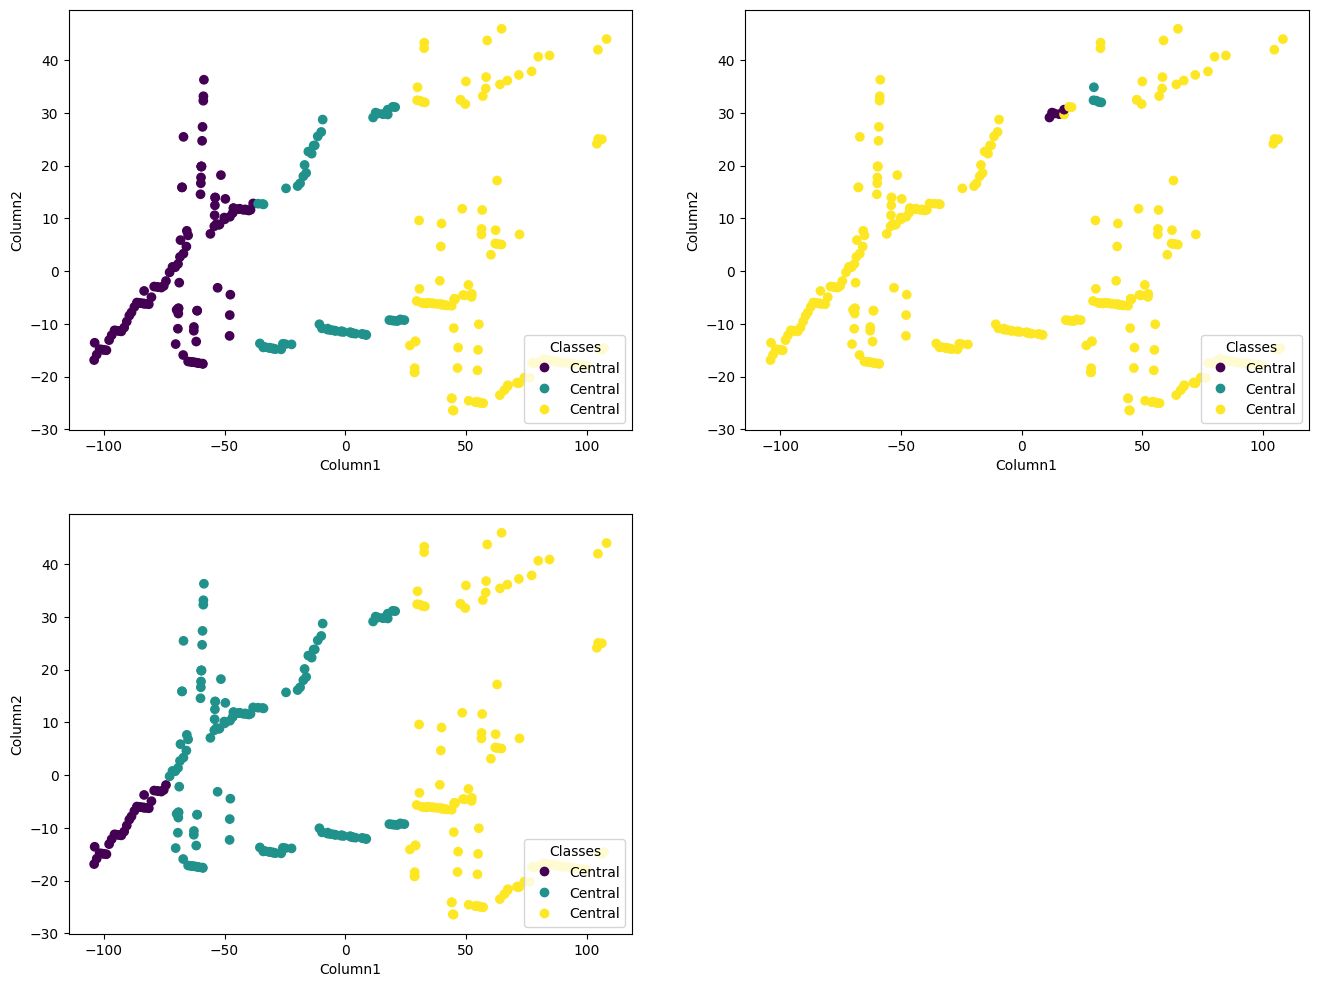

In [163]:
labels = [2 if val == 1 else 1 if val == 2 else val for val in kmeans.labels_]

plt.figure(figsize=(16, 12))
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels,
    y_names,
    plt.subplot(2, 2, 1),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    result,
    y_names,
    plt.subplot(2, 2, 2),
)
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    y,
    y_names,
    plt.subplot(2, 2, 3),
)

#### Выбор количества кластеров на основе инерции

Инерция -- сумма квадратов расстояний выборок до ближайшего центра кластера, взвешенная по весам выборок, если таковые имеются.

range(2, 18)

[333796.3622227103,
 227000.56461710864,
 185314.7854826377,
 143721.17396549985,
 108417.20606924823,
 87230.27903941259,
 77436.45116533124,
 68756.69532827211,
 61714.75539849603,
 50817.423692624965,
 45679.1111531831,
 37958.05321477543,
 35061.71452013673,
 31684.782941418518,
 31187.42821565408,
 26374.767609593473]

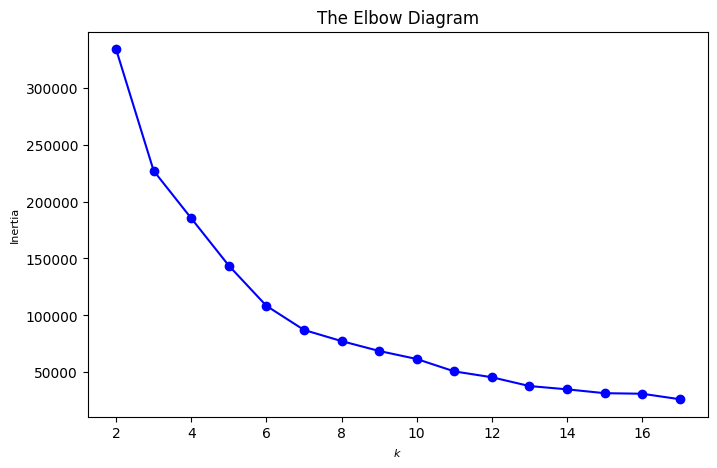

In [165]:
from src.clusters import get_clusters_inertia
from src.visual import draw_elbow_diagram


inertias, clusters_range = get_clusters_inertia(sightdf, random_state)
display(clusters_range)
display(inertias)
draw_elbow_diagram(inertias, clusters_range)

#### Выбор количества кластеров на основе коэффициента силуэта

Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера (а) и среднего расстояния до ближайшего кластера (b) для каждого образца. Коэффициент силуэта для образца равен (b - a) / max(a, b). Для пояснения: b — это расстояние между образцом и ближайшим кластером, частью которого образец не является. Обратите внимание, что коэффициент силуэта определяется только в том случае, если количество меток равно 2 <= n_labels <= n_samples - 1.

Эта функция возвращает средний коэффициент силуэта по всем образцам. 

Лучшее значение — 1, худшее — -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру.

range(2, 18)

[0.5966865813056985,
 0.45290199043440355,
 0.3653635029586656,
 0.3829356640544037,
 0.42067553501446575,
 0.45022814258992044,
 0.4560312594085631,
 0.4393145202632342,
 0.4203853556213081,
 0.44144672891961084,
 0.4320183350118141,
 0.46457886737708426,
 0.45740951020846127,
 0.45971612314122934,
 0.46212962886860626,
 0.4821751988969549]

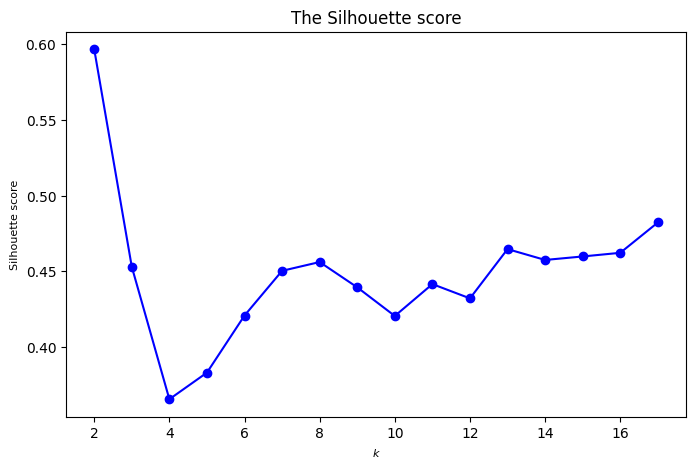

In [167]:
from src.clusters import get_clusters_silhouette_scores
from src.visual import draw_silhouettes_diagram

silhouette_scores, clusters_range = get_clusters_silhouette_scores(sightdf, random_state)
display(clusters_range)
display(silhouette_scores)
draw_silhouettes_diagram(silhouette_scores, clusters_range)

#### Пример анализа силуэтов для разбиения от 2 до 12 кластеров

max_clusters = int(math.sqrt(len(df)))

https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

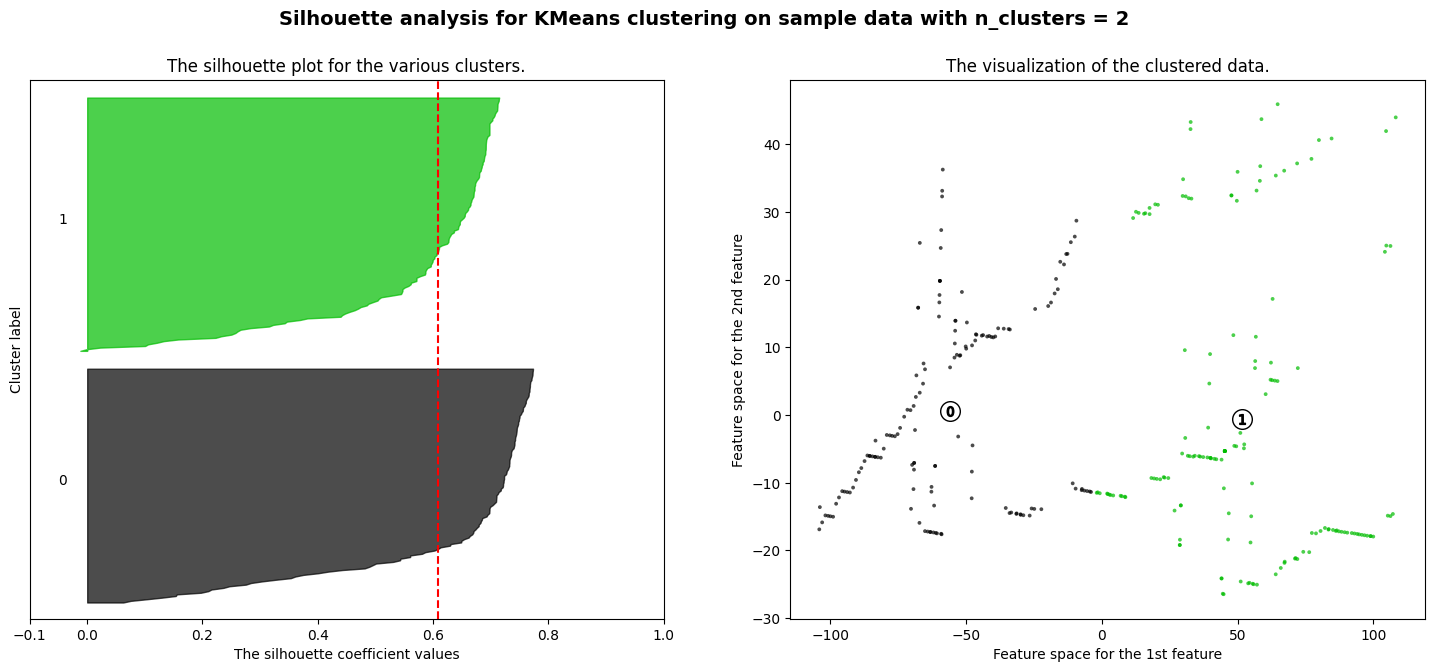

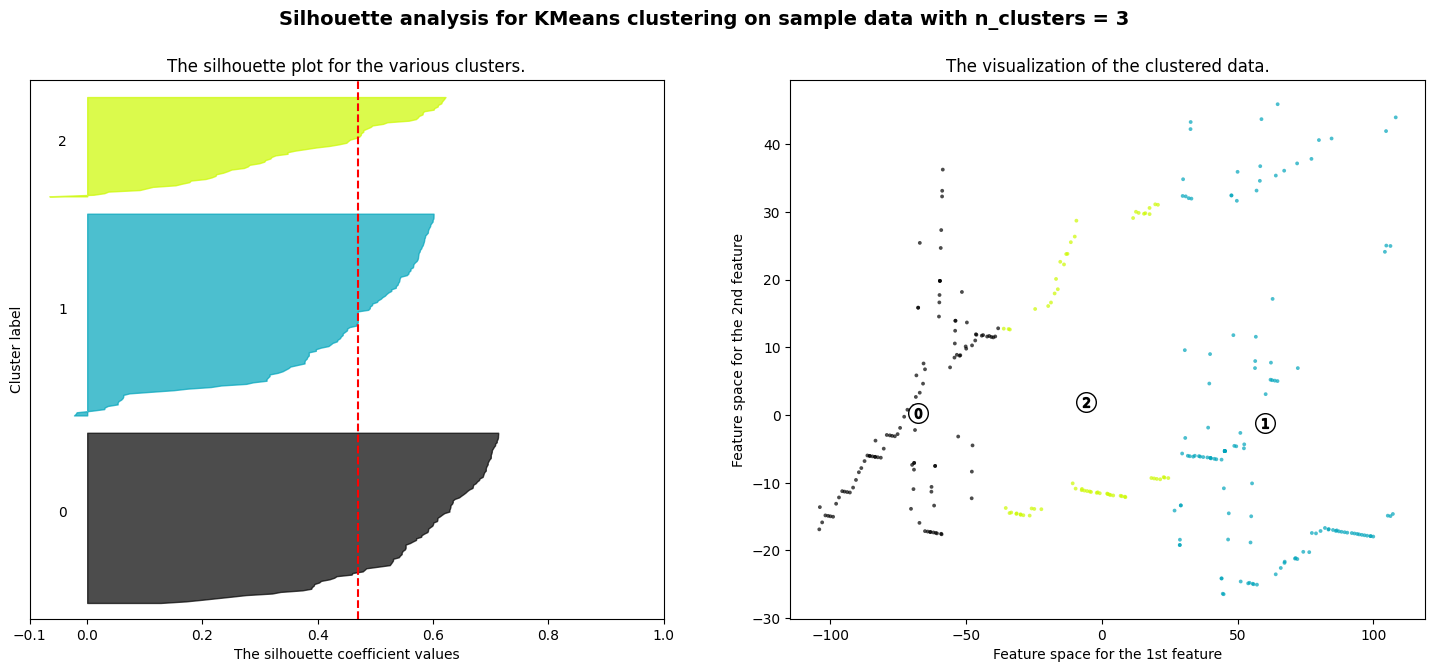

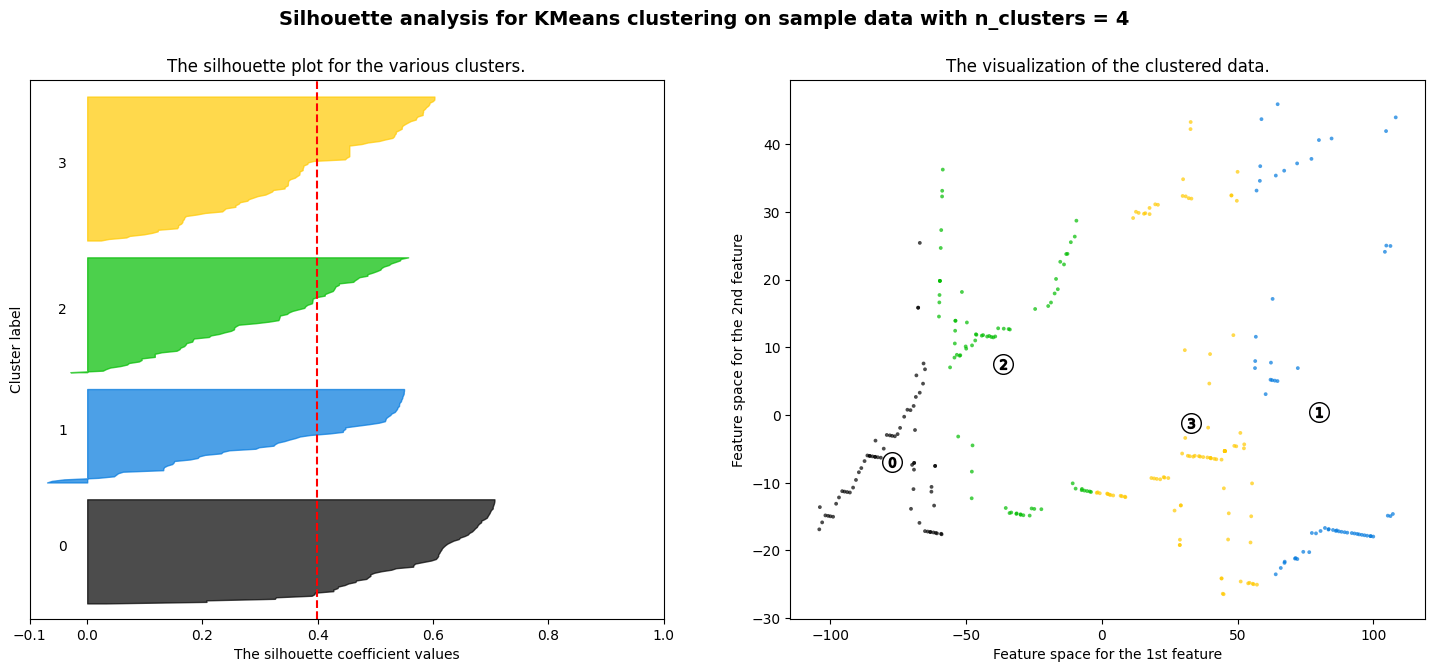

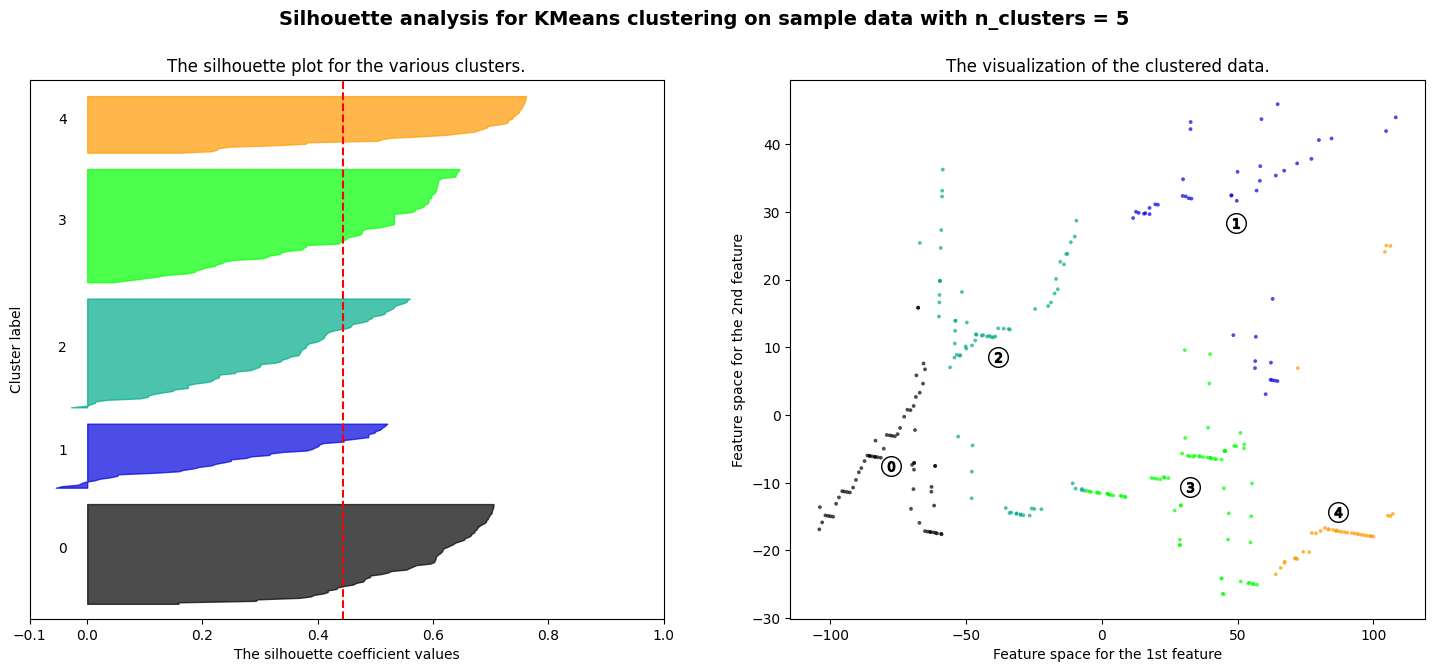

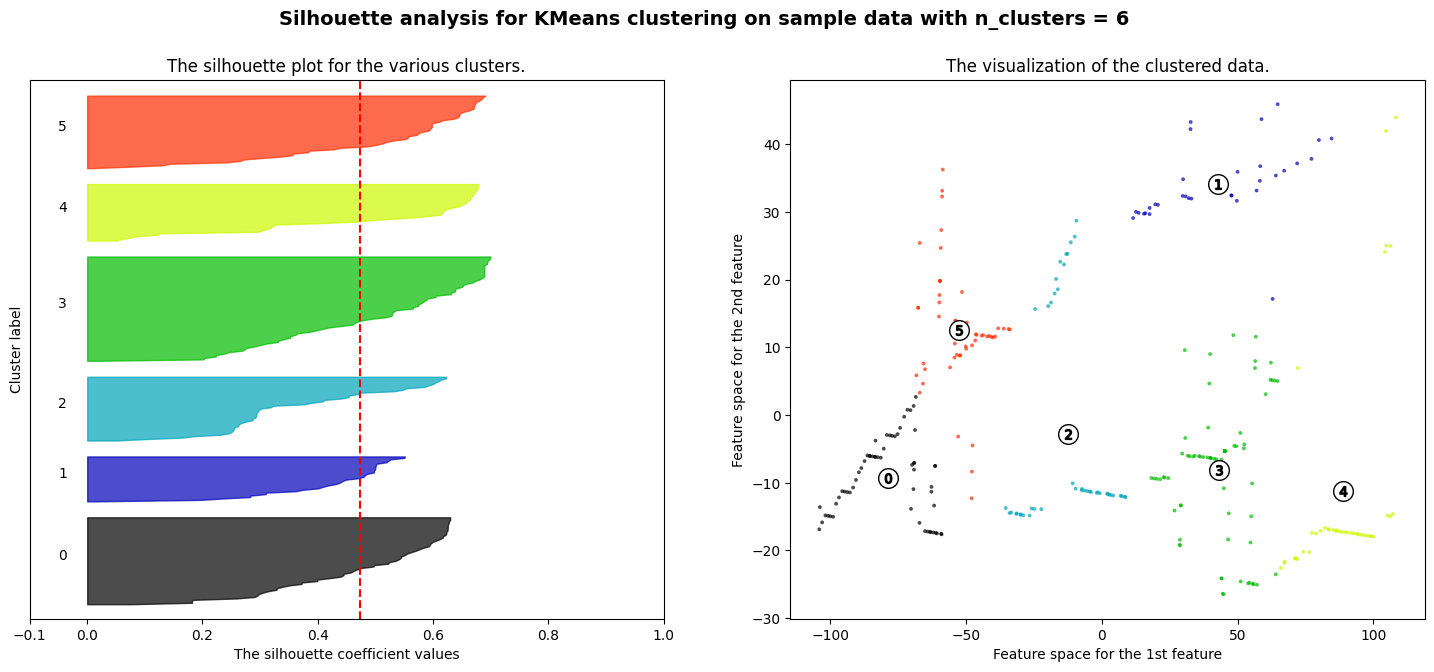

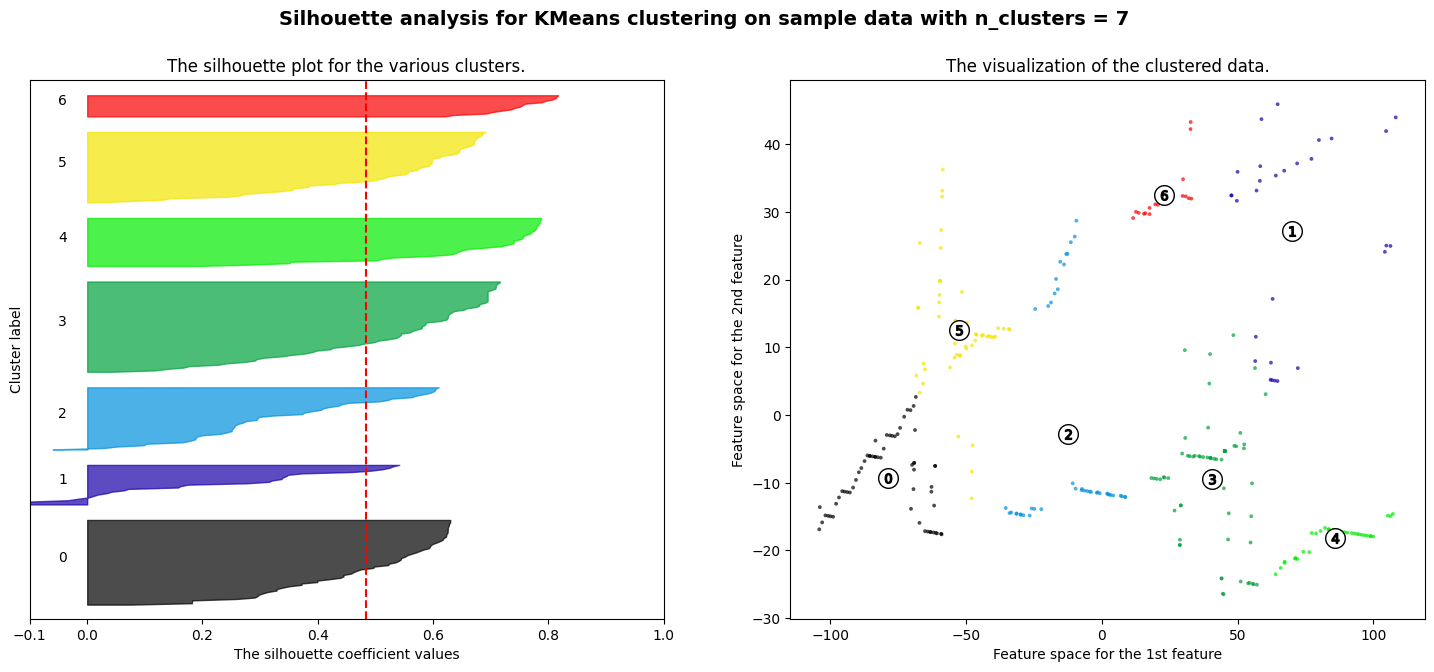

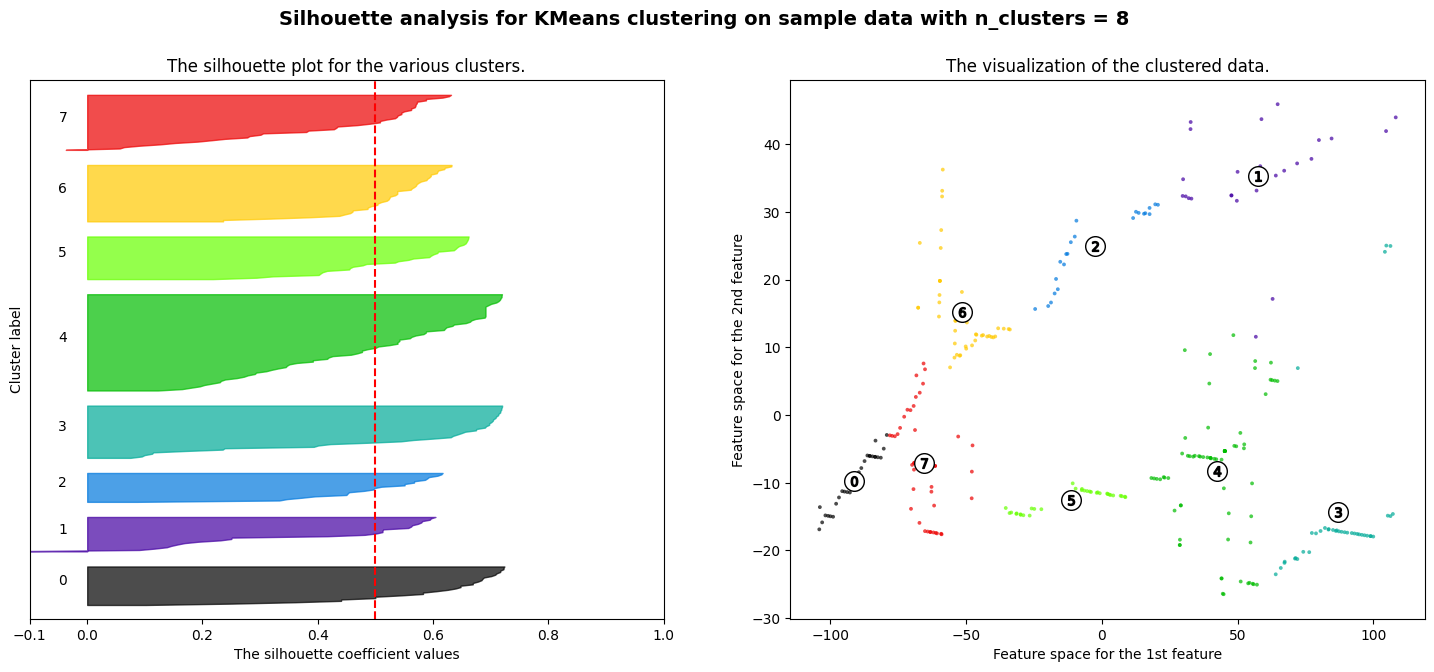

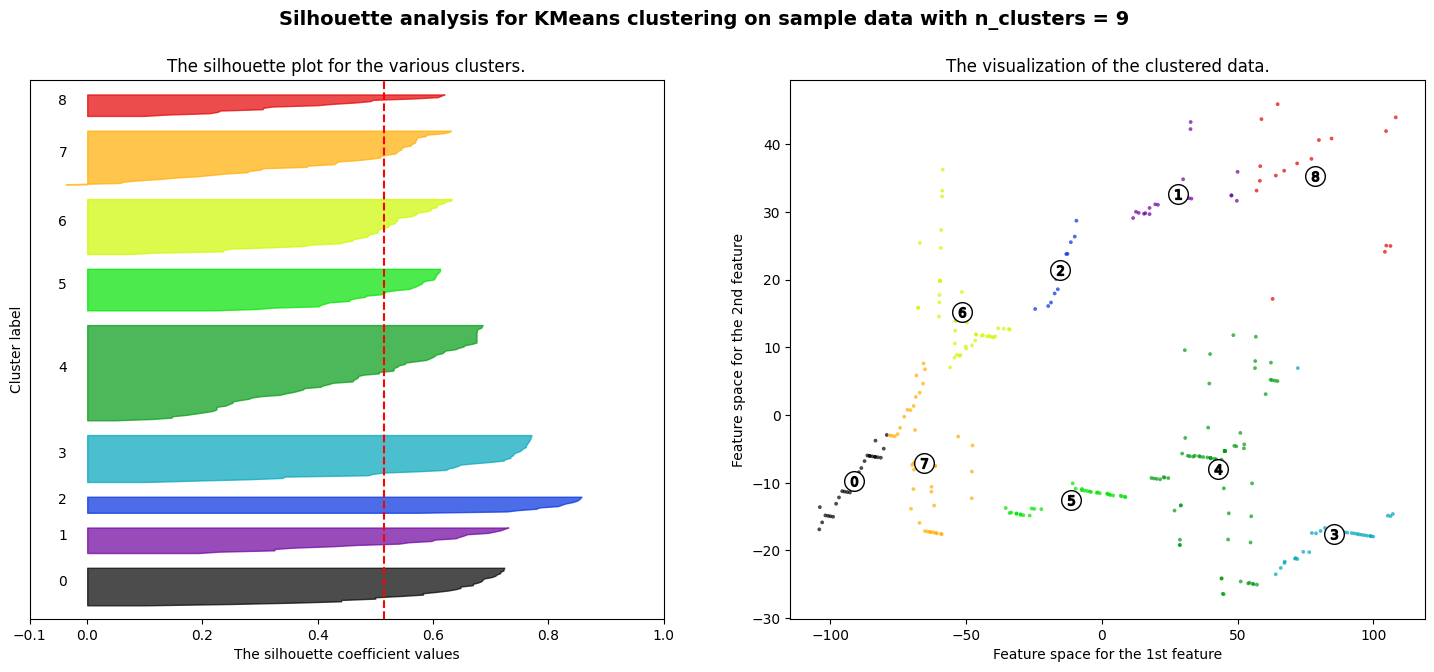

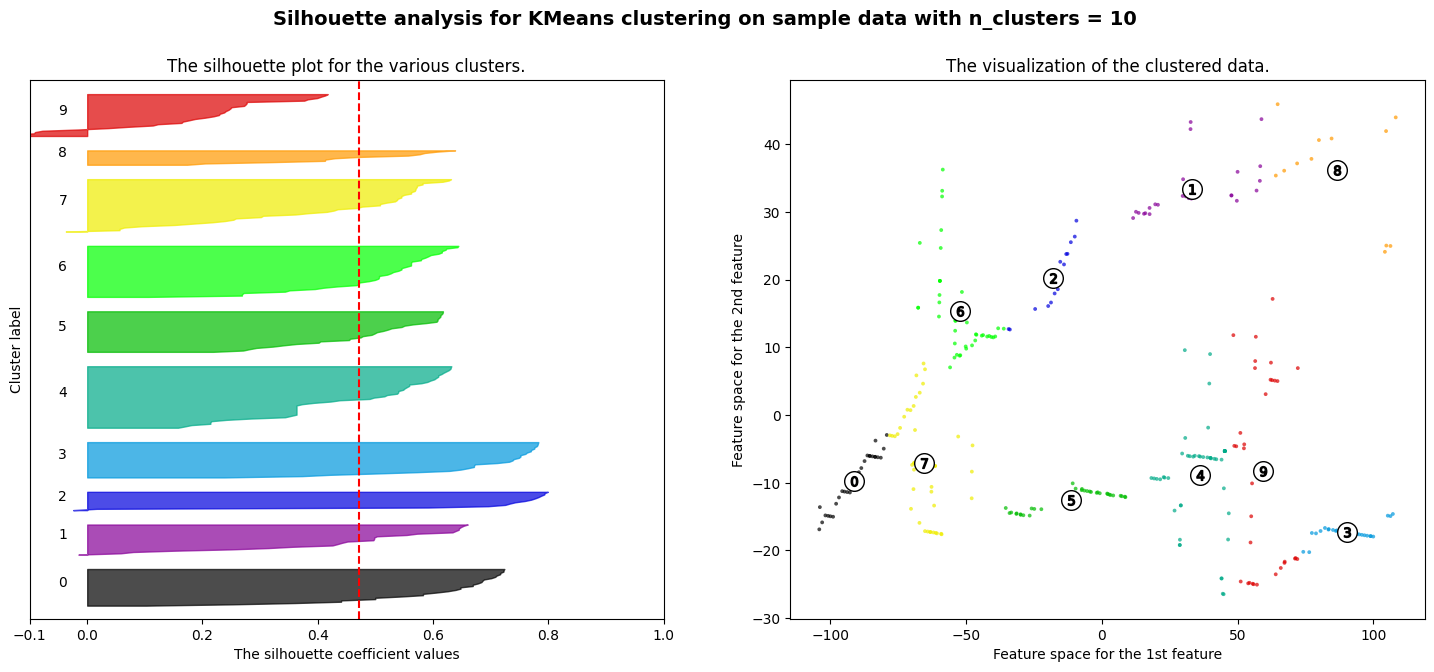

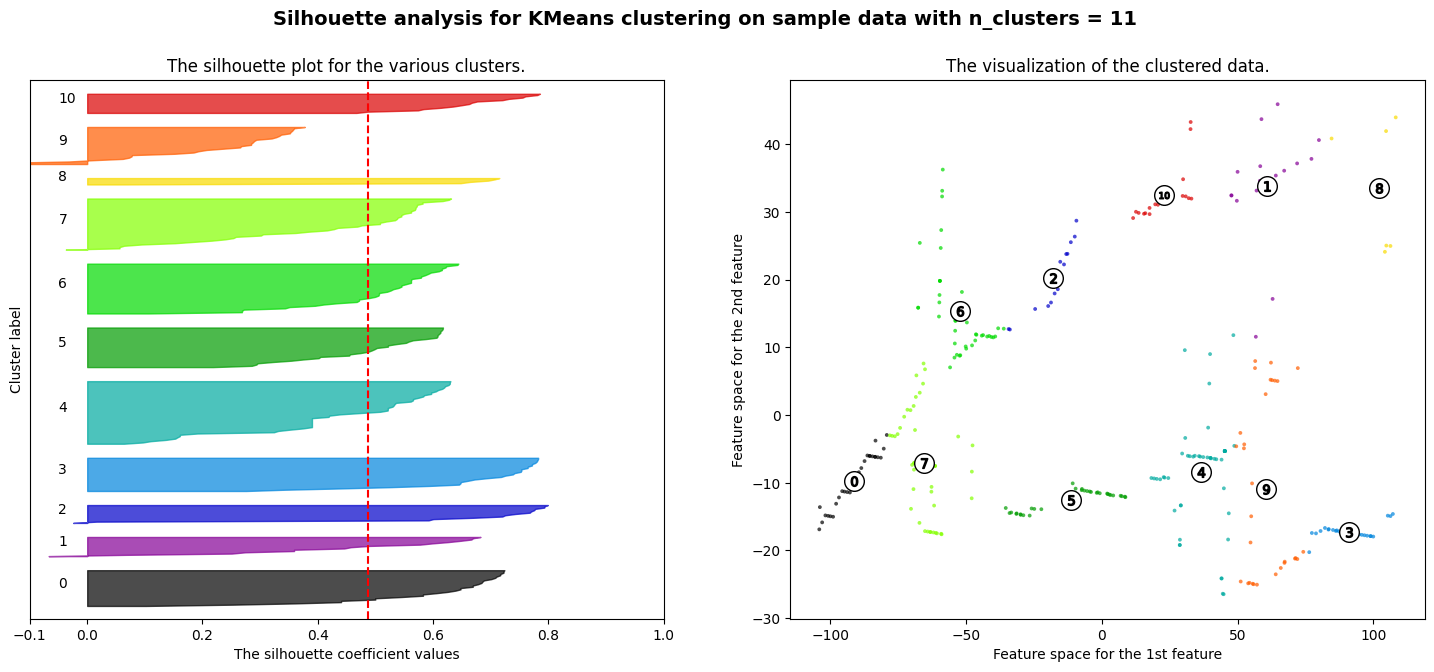

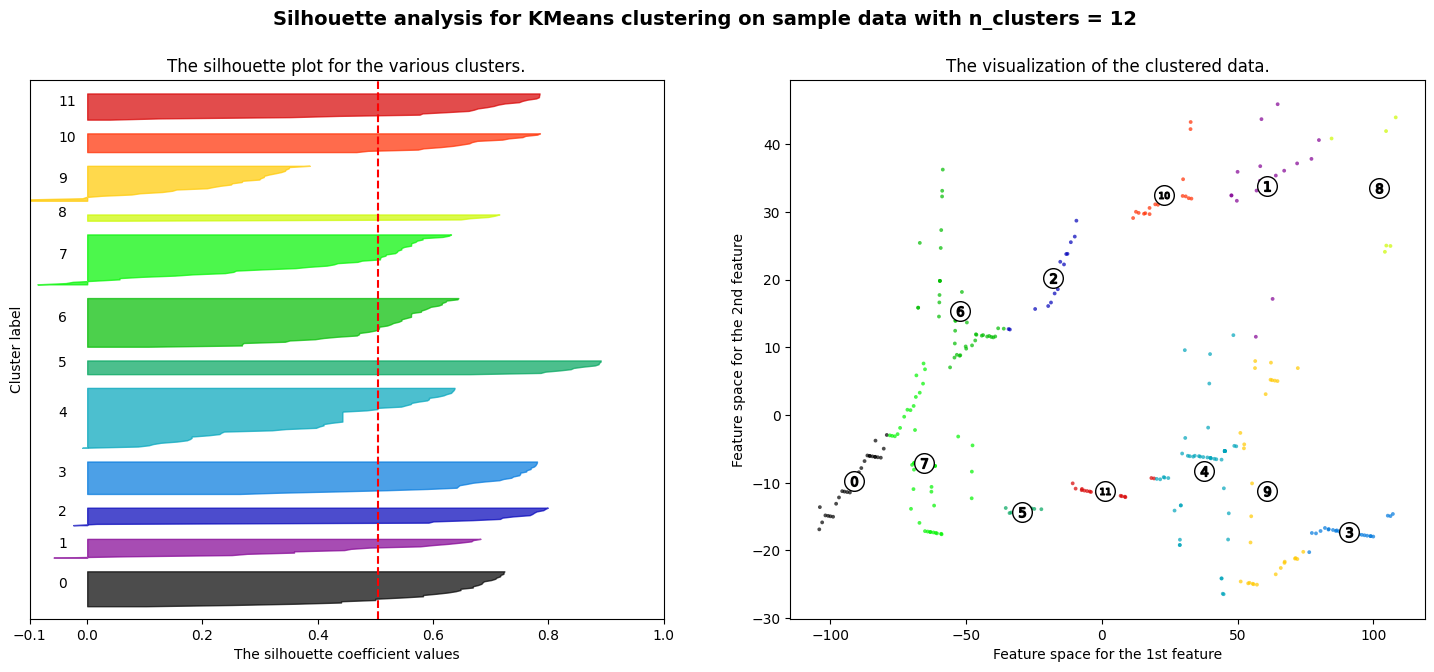

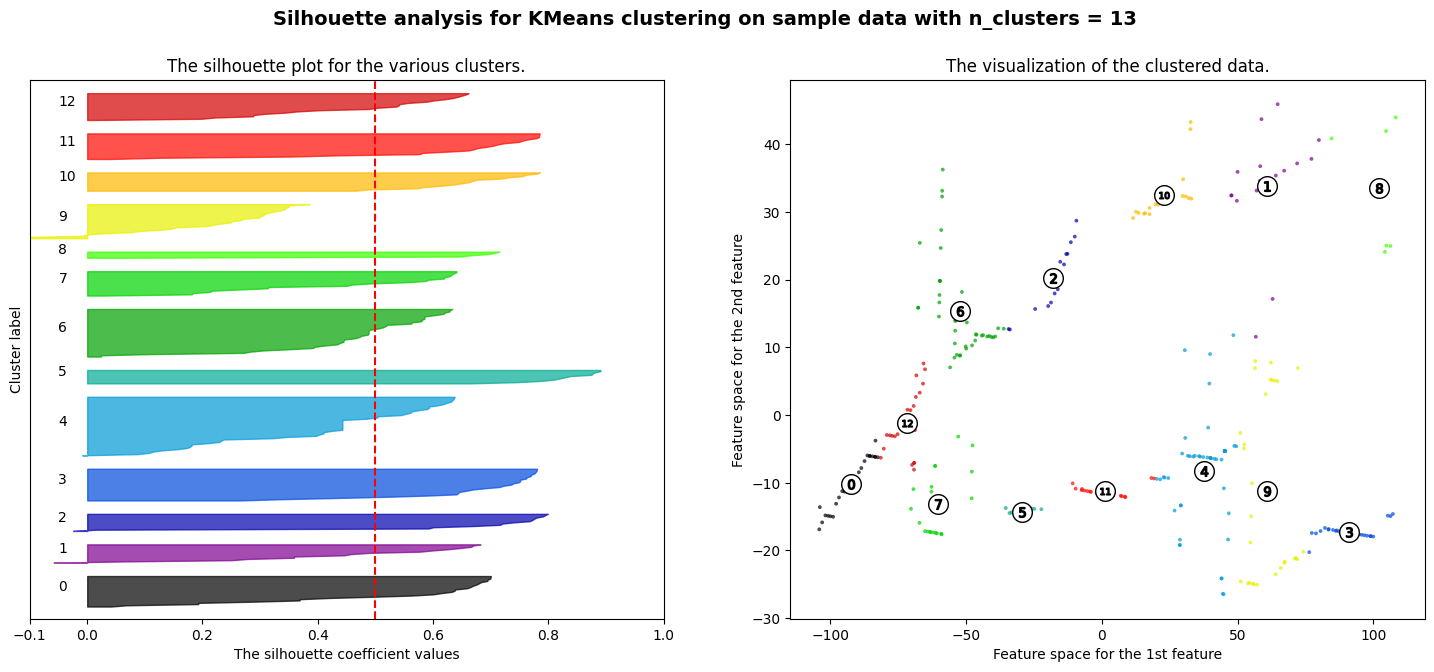

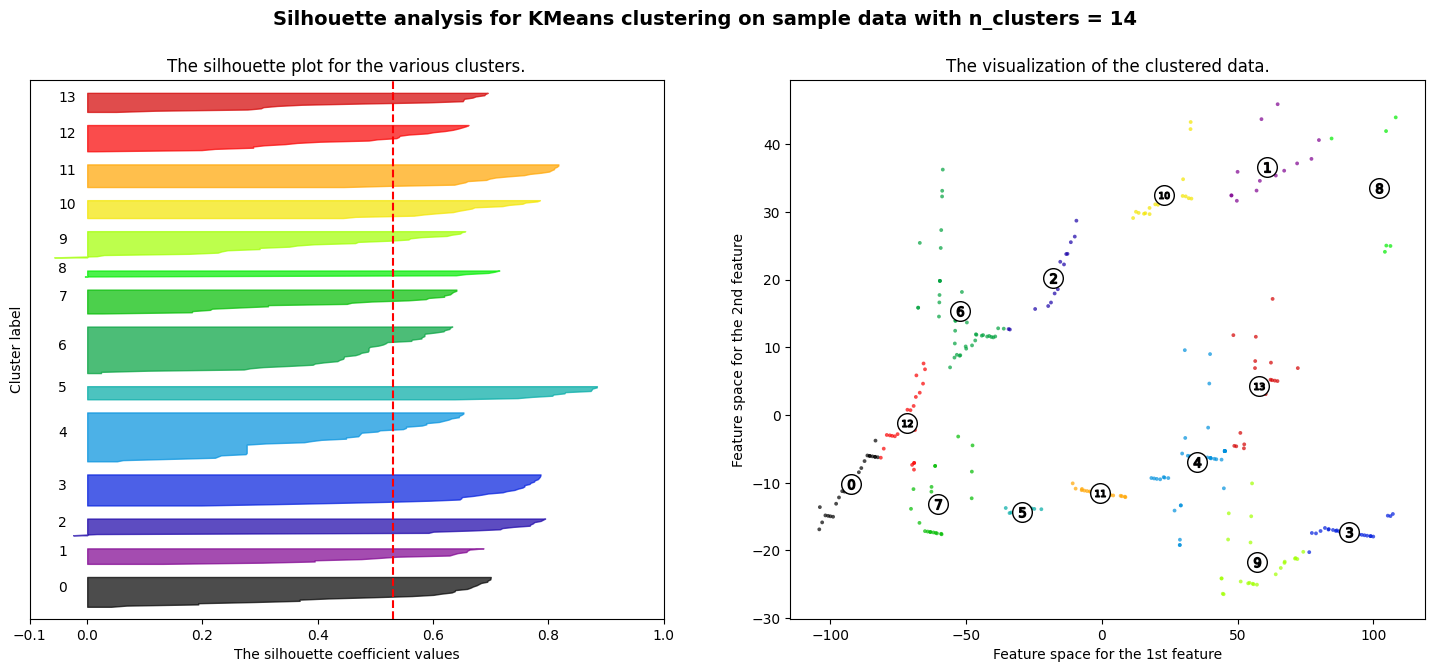

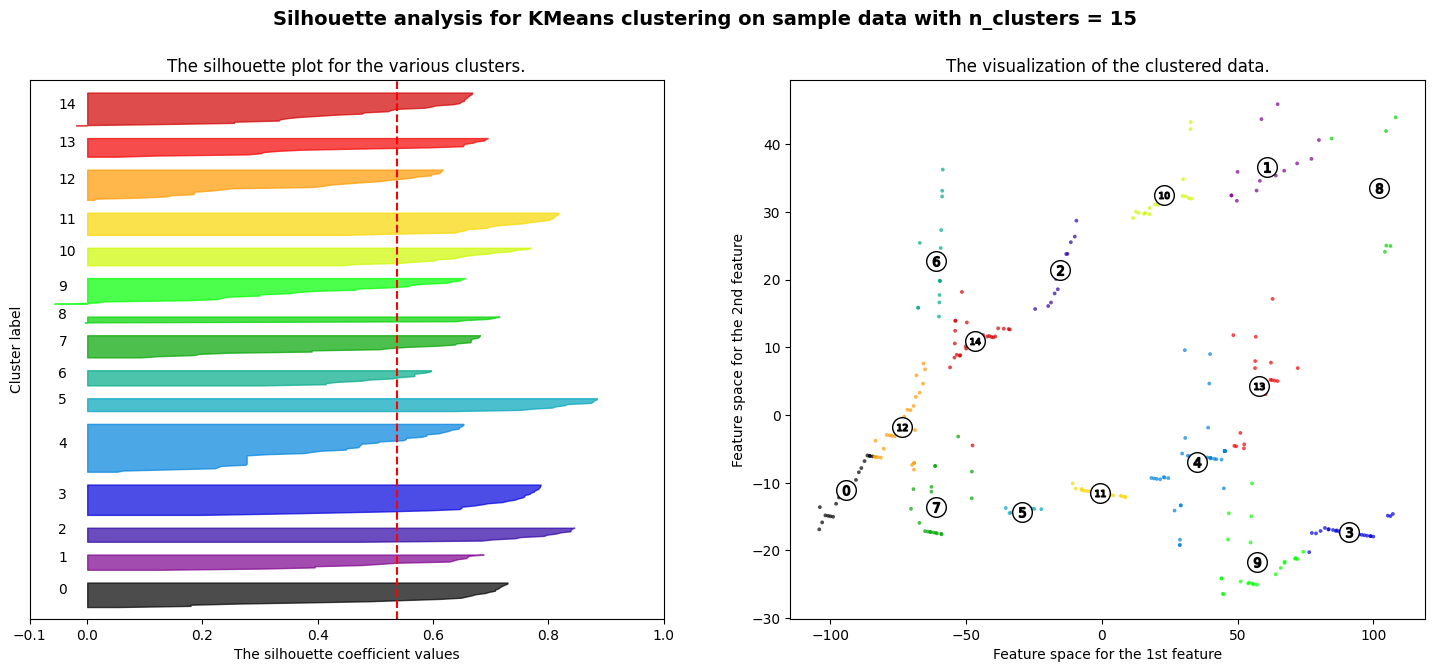

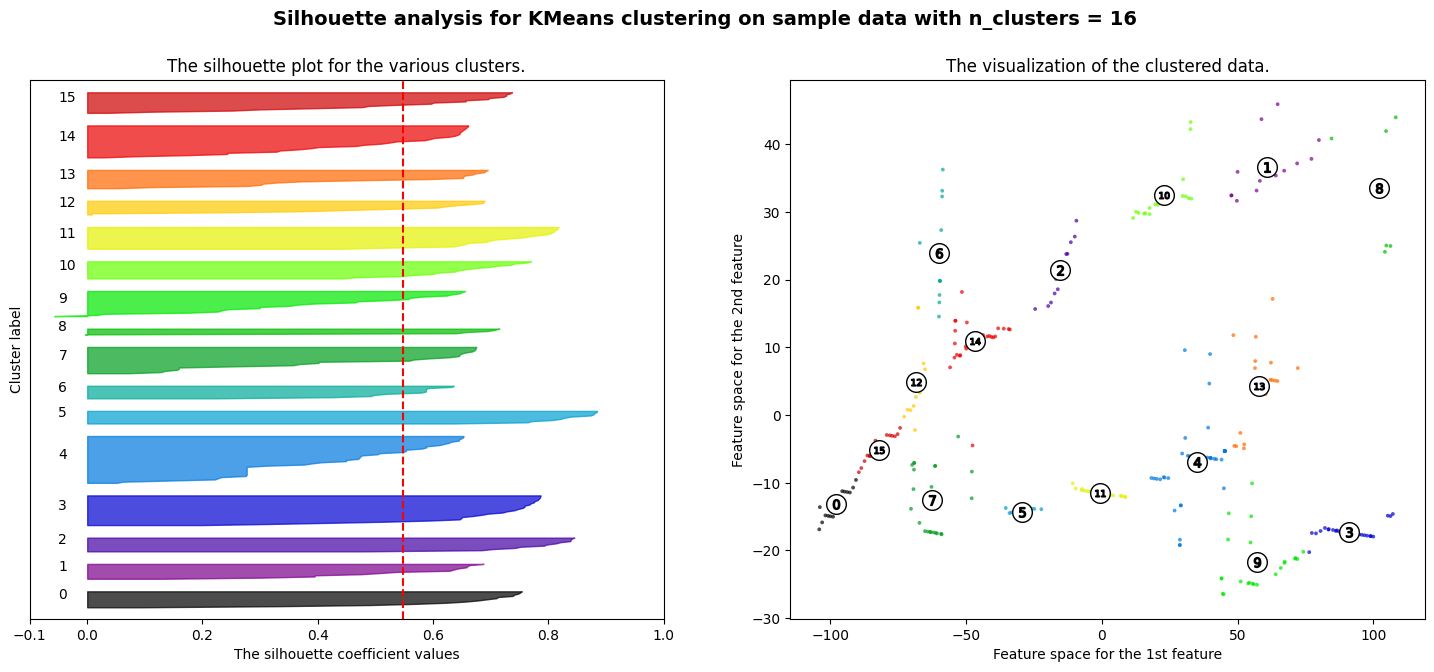

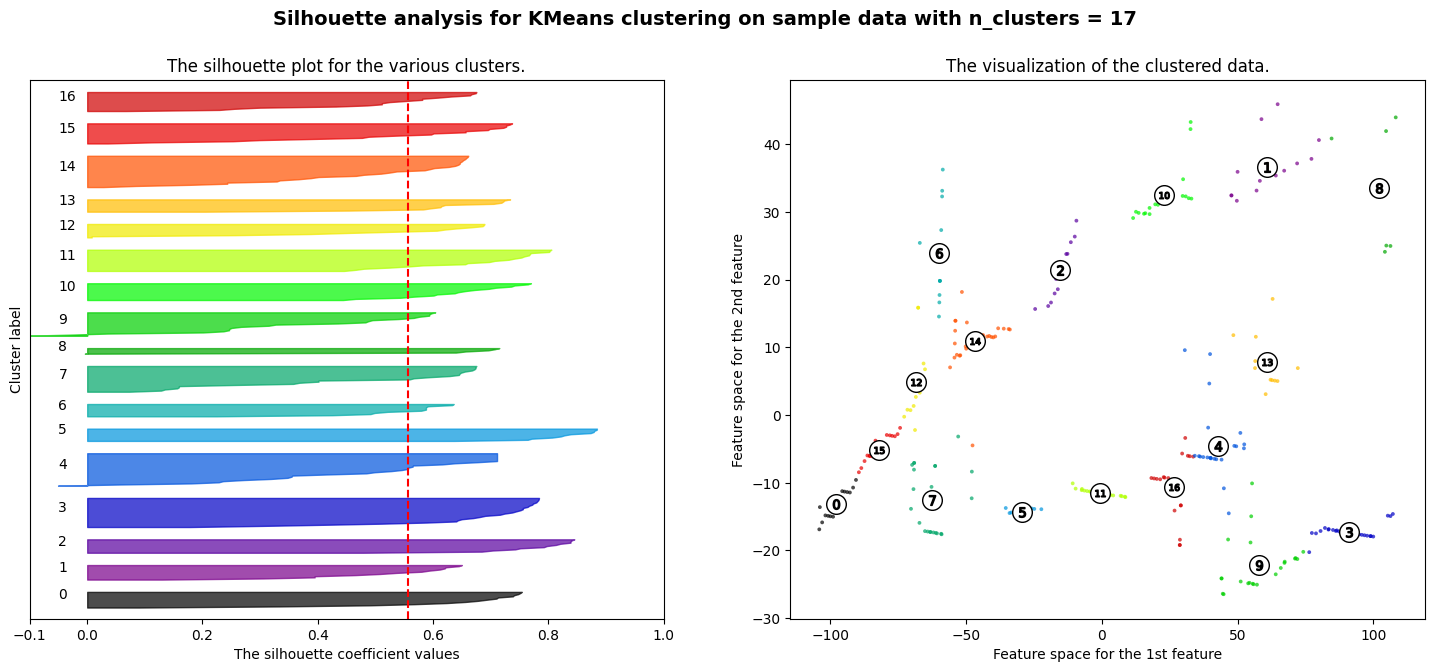

In [168]:
from src.clusters import get_clusters_silhouettes
from src.visual import draw_silhouettes


silhouettes = get_clusters_silhouettes(reduced_data, random_state)
draw_silhouettes(reduced_data, silhouettes)